In this notebook, we plot the GW tensor speeds for Horndeski theory and massive gravity. We overlay this with constraints and frequency sensitivities of GW detectors (LVK, LISA, PTA).

/tmp/ipykernel_141/583677551.py:16: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(condition, ov * np.sqrt((1 - ffc ** 2) / (1 - np.sqrt(1 - ffc ** 2))),
/tmp/ipykernel_141/583677551.py:16: RuntimeWarning: divide by zero encountered in true_divide
  result = np.where(condition, ov * np.sqrt((1 - ffc ** 2) / (1 - np.sqrt(1 - ffc ** 2))),
/tmp/ipykernel_141/1624460013.py:13: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(condition, np.sqrt(1 - mg_f**2), vg_pol10_massgrav(mg_f))


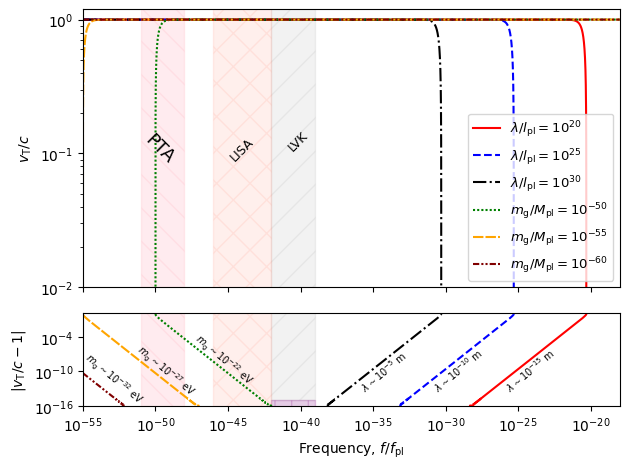

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Horndeski + Gauss Bonnet coupling
def vg_pol10_horndeski0(x):
    t0 = 1
    t1 = -5*(x**2)/8
    t2 = -13*(x**4)/128
    t3 = -49*(x**6)/1024
    t4 = -957*(x**8)/32768
    t5 = -5291*(x**10)/262144
    return t0 + t1 + t2 + t3 + t4 + t5

def vg_horndeski0(f_fpl, lmd_lpl):
    # GW speed/c wrt planck frequency
    fc_fpl = 0.5 / lmd_lpl
    ffc = f_fpl / fc_fpl
    condition = np.greater(ffc, 1e-3)  # Element-wise comparison
    ov = ffc / np.sqrt(2)
    result = np.where(condition, ov * np.sqrt((1 - ffc ** 2) / (1 - np.sqrt(1 - ffc ** 2))),
                      vg_pol10_horndeski0(ffc))
    return result

# massive gravity

def vg_pol10_massgrav(x):
    t0 = 1
    t1 = -(x**2)/2
    t2 = -(x**4)/8
    t3 = -(x**6)/16
    t4 = -5*(x**8)/128
    t5 = -7*(x**10)/256
    return t0 + t1 + t2 + t3 + t4 + t5

def vg_massgrav(f_fpl, mg_mpl):
    mg_f = mg_mpl / f_fpl[:, np.newaxis]  # Corrected indexing here
    condition = np.greater(mg_f, 1e-3)
    result = np.where(condition, np.sqrt(1 - mg_f**2), vg_pol10_massgrav(mg_f))
    return result

# Set the value of lambda and graviton mass
lmd_lpl_vals = np.array([1e20, 1e25, 1e30])
mg_mpl_vals = np.array([1e-50, 1e-55, 1e-60])
f_fpl_vals = np.logspace(-55, -18, 1000000)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax1.fill_betweenx([1e-3, 1e1], 1e-42, 1e-39, color='gray', alpha=0.1, hatch='/', rasterized = True)  # LVK band
ax1.fill_betweenx([1e-3, 1e1], 1e-46, 1e-42, color='tomato', alpha=0.1, hatch='x', rasterized = True)  # LISA/TianQin band
ax1.fill_betweenx([1e-3, 1e1], 1e-51, 1e-48, color='pink', alpha=0.3, hatch='\\', rasterized = True)  # PTA band

line_styles = ['r-', 'b--', 'k-.']  # Line styles for each curve
# Plot the main plot (vg)
for i in range(len(lmd_lpl_vals)):
    ax1.plot(f_fpl_vals, vg_horndeski0(f_fpl_vals, lmd_lpl_vals[i]), \
             line_styles[i], label=r'$\lambda/l_{{\rm pl}} = 10^{{{:.0f}}}$'.format(np.log10(lmd_lpl_vals[i])))

mgclrs = ['green', 'orange', 'maroon']  # Line styles for each curve
mglsty = [(0, (1, 1)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]
for i in range(len(mg_mpl_vals)):
    ax1.plot(f_fpl_vals, vg_massgrav(f_fpl_vals, mg_mpl_vals[i]), \
             color = mgclrs[i], ls = mglsty[i], \
             label=r'$m_{{\rm g}}/M_{{\rm pl}} = 10^{{{:.0f}}}$'.format(np.log10(mg_mpl_vals[i])))

ax1.text(1e-41, 1e-1, 'LVK',
         color='black', fontsize=9, verticalalignment='bottom', rotation = 45)
ax1.text(1e-45, 0.85e-1, 'LISA',
         color='black', fontsize=9, verticalalignment='bottom', rotation = 45)
ax1.text(1e-51, 0.8e-1, 'PTA',
         color='black', fontsize=13, verticalalignment='bottom', rotation = -45)

ax1.set_xlim(left=1e-55)
ax1.set_ylim(bottom=1e-2, top=1e0 + 0.2)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$v_{\rm T}/c$')
ax1.legend(loc='lower right', prop={'size': 9.5})

# Plot the |vg - 1| plot
xpos = [1e-36, 1e-31, 1e-26]
ypos = [1e-14, 1e-14, 1e-14]
txts = [r'$\lambda \sim 10^{-5} \ {\rm m}$', \
        r'$\lambda \sim 10^{-10} \ {\rm m}$', \
        r'$\lambda \sim 10^{-15} \ {\rm m}$']
for i in range(len(lmd_lpl_vals)):
    ax2.plot(f_fpl_vals, np.abs(vg_horndeski0(f_fpl_vals, lmd_lpl_vals[i]) - 1), line_styles[i])
    # Add text labels to the lines
    ax2.text(xpos[i], ypos[i], txts[i],
             color='black', fontsize=7, verticalalignment='bottom', rotation = 40)

xpos = [3e-48, 3e-52, 0.8e-55]
ypos = [1e-13, 1e-15, 0.5e-16]
txts = [r'$m_{\rm g} \sim 10^{-22} \ {\rm eV}$', \
        r'$m_{\rm g} \sim 10^{-27} \ {\rm eV}$', \
        r'$m_{\rm g} \sim 10^{-32} \ {\rm eV}$']
for i in range(len(mg_mpl_vals)):
    ax2.plot(f_fpl_vals, np.abs(vg_massgrav(f_fpl_vals, mg_mpl_vals[i]) - 1), \
             color = mgclrs[i], ls = mglsty[i])
    # Add text labels to the lines
    ax2.text(xpos[i], ypos[i], txts[i],
             color='black', fontsize=7, verticalalignment='bottom', rotation = -40)

ax2.fill_betweenx([1e-15, 1e1], 1e-42, 1e-39, color='gray', alpha=0.1, hatch='/', rasterized = True)  # LVK band
ax2.fill_betweenx([1e-20, 1e-15], 1e-42, 1e-39, color='purple', alpha=0.2, hatch='|', rasterized = True)  # LVK band
ax2.fill_betweenx([1e-20, 1e1], 1e-46, 1e-42, color='tomato', alpha=0.1, hatch='x', rasterized = True)  # LISA/TianQin band
ax2.fill_betweenx([1e-20, 1e1], 1e-51, 1e-48, color='pink', alpha=0.3, hatch='\\', rasterized = True)  # PTA band

ax2.set_xlim(left=1e-55)
ax2.set_ylim(bottom=1e-16, top=1e0 + 0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'Frequency, $f/f_{\rm pl}$')
ax2.set_ylabel(r'$|v_{\rm T}/c - 1|$')

plt.tight_layout()
fig.savefig('figs/vg.pdf', bbox_inches='tight')
plt.show()

End of notebook